In [3]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import yfinance as yf

Tensorflow version: 2.15.0


/tmp/ipykernel_34/907957111.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
start_date = "2000-08-23"
end_date = "2024-04-01"

oil = yf.download('CL=F', start=start_date, end=end_date)
exxon = yf.download('XOM',start=start_date,end=end_date)
chevron = yf.download("CVX", start=start_date, end=end_date)

oil['Volume'].replace(to_replace=0, method='ffill', inplace=True)
oil.sort_values('Date', inplace=True)

exxon['Volume'].replace(to_replace=0, method='ffill', inplace=True)
exxon.sort_values('Date', inplace=True)

chevron['Volume'].replace(to_replace=0, method='ffill', inplace=True)
chevron.sort_values('Date', inplace=True)

oil[['Open', 'High', 'Low', 'Close', 'Volume']] = oil[['Open', 'High', 'Low', 'Close', 'Volume']].rolling(10).mean()
exxon[['Open', 'High', 'Low', 'Close', 'Volume']] = exxon[['Open', 'High', 'Low', 'Close', 'Volume']].rolling(10).mean()
chevron[['Open', 'High', 'Low', 'Close', 'Volume']] = chevron[['Open', 'High', 'Low', 'Close', 'Volume']].rolling(10).mean()

oil.dropna(how='any', axis=0, inplace=True)
chevron.dropna(how='any', axis=0, inplace=True)
exxon.dropna(how='any', axis=0, inplace=True)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_34/4183070851.py:8: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  oil['Volume'].replace(to_replace=0, method='ffill', inplace=True)
/tmp/ipykernel_34/4183070851.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oil['Volume'].replace(to_replace

In [5]:
oil['Open'] = oil['Open'].pct_change() # Create arithmetic returns column
oil['High'] = oil['High'].pct_change() # Create arithmetic returns column
oil['Low'] = oil['Low'].pct_change() # Create arithmetic returns column
oil['Close'] = oil['Close'].pct_change() # Create arithmetic returns column
oil['Volume'] = oil['Volume'].pct_change()

oil.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

###############################################################################
'''Normalize price columns'''

min_return1 = min(oil[['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return1 = max(oil[['Open', 'High', 'Low', 'Close']].max(axis=0))

# Min-max normalize price columns (0-1 range)
oil['Open'] = (oil['Open'] - min_return1) / (max_return1 - min_return1)
oil['High'] = (oil['High'] - min_return1) / (max_return1 - min_return1)
oil['Low'] = (oil['Low'] - min_return1) / (max_return1 - min_return1)
oil['Close'] = (oil['Close'] - min_return1) / (max_return1 - min_return1)

###############################################################################
'''Normalize volume column'''

min_volume1 = oil['Volume'].min(axis=0)
max_volume1 = oil['Volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
oil['Volume'] = (oil['Volume'] - min_volume1) / (max_volume1 - min_volume1)




exxon['Open'] = exxon['Open'].pct_change() # Create arithmetic returns column
exxon['High'] = exxon['High'].pct_change() # Create arithmetic returns column
exxon['Low'] = exxon['Low'].pct_change() # Create arithmetic returns column
exxon['Close'] = exxon['Close'].pct_change() # Create arithmetic returns column
exxon['Volume'] = exxon['Volume'].pct_change()

exxon.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

###############################################################################
'''Normalize price columns'''

min_return = min(exxon[['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return = max(exxon[['Open', 'High', 'Low', 'Close']].max(axis=0))

# Min-max normalize price columns (0-1 range)
exxon['Open'] = (exxon['Open'] - min_return) / (max_return - min_return)
exxon['High'] = (exxon['High'] - min_return) / (max_return - min_return)
exxon['Low'] = (exxon['Low'] - min_return) / (max_return - min_return)
exxon['Close'] = (exxon['Close'] - min_return) / (max_return - min_return)

###############################################################################
'''Normalize volume column'''

min_volume = exxon['Volume'].min(axis=0)
max_volume = exxon['Volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
exxon['Volume'] = (exxon['Volume'] - min_volume) / (max_volume - min_volume)



chevron['Open'] = chevron['Open'].pct_change() # Create arithmetic returns column
chevron['High'] = chevron['High'].pct_change() # Create arithmetic returns column
chevron['Low'] = chevron['Low'].pct_change() # Create arithmetic returns column
chevron['Close'] = chevron['Close'].pct_change() # Create arithmetic returns column
chevron['Volume'] = chevron['Volume'].pct_change()

chevron.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values

###############################################################################
'''Normalize price columns'''

min_return2 = min(chevron[['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return2 = max(chevron[['Open', 'High', 'Low', 'Close']].max(axis=0))

# Min-max normalize price columns (0-1 range)
chevron['Open'] = (chevron['Open'] - min_return2) / (max_return2 - min_return2)
chevron['High'] = (chevron['High'] - min_return2) / (max_return2 - min_return2)
chevron['Low'] = (chevron['Low'] - min_return2) / (max_return2 - min_return2)
chevron['Close'] = (chevron['Close'] - min_return2) / (max_return2 - min_return2)

###############################################################################
'''Normalize volume column'''

min_volume2 = chevron['Volume'].min(axis=0)
max_volume2 = chevron['Volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
chevron['Volume'] = (chevron['Volume'] - min_volume2) / (max_volume2 - min_volume2)





In [6]:
exxon

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-07,0.650860,0.645815,0.650835,0.642683,19.926344,0.371845
2000-09-08,0.649838,0.656972,0.650834,0.664145,19.866863,0.372451
2000-09-11,0.663113,0.684367,0.671381,0.688407,20.220028,0.561396
2000-09-12,0.704956,0.697465,0.690859,0.702850,20.402203,0.571988
2000-09-13,0.703755,0.700360,0.704069,0.708521,20.417070,0.473048
...,...,...,...,...,...,...
2024-03-22,0.731523,0.719141,0.729366,0.717224,113.489998,0.395299
2024-03-25,0.722928,0.735385,0.734342,0.723248,114.650002,0.378243
2024-03-26,0.722831,0.723383,0.720378,0.720973,113.790001,0.392962


In [7]:
chevron

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-07,0.624496,0.599057,0.613782,0.594407,18.526434,0.208308
2000-09-08,0.610584,0.613538,0.606002,0.607513,18.185541,0.238512
2000-09-11,0.602882,0.631795,0.613762,0.631402,18.736225,0.285909
2000-09-12,0.635193,0.618803,0.626926,0.621326,18.578890,0.305078
2000-09-13,0.624349,0.626353,0.628412,0.633562,18.592003,0.276581
...,...,...,...,...,...,...
2024-03-22,0.640951,0.637754,0.641584,0.634405,154.660004,0.235148
2024-03-25,0.635759,0.637218,0.640807,0.632165,156.470001,0.235235
2024-03-26,0.633651,0.630672,0.628063,0.624582,155.270004,0.253152


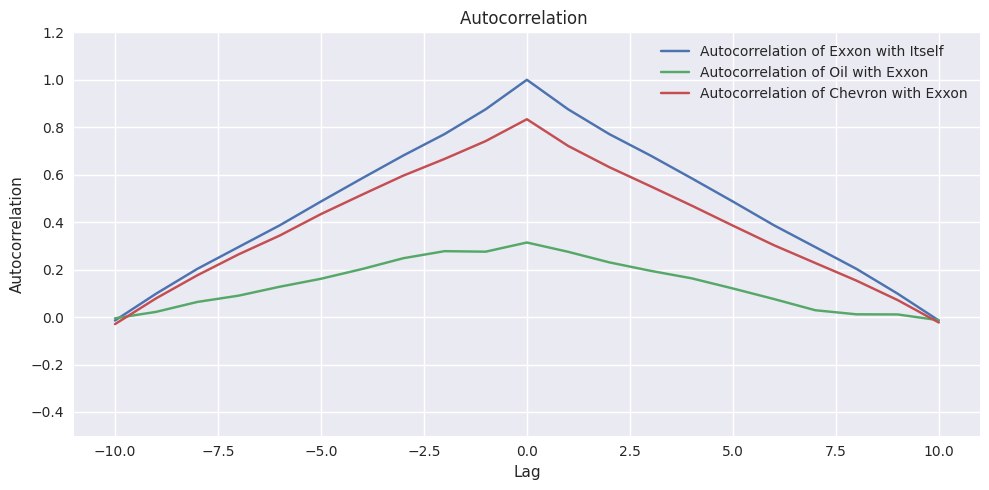

In [8]:
autocorr_values_A = []
max_lag = 10
for lag in range(-max_lag, max_lag + 1):
  shifted_prices_A = exxon['Close'].shift(lag)
  autocorr = exxon['Close'].corr(shifted_prices_A)
  autocorr_values_A.append(autocorr)

autocorr_values_B_to_A = []
for lag in range(-max_lag, max_lag + 1):
  shifted_prices_A = exxon['Close'].shift(-lag)
  autocorr = oil['Close'].corr(shifted_prices_A)
  autocorr_values_B_to_A.append(autocorr)


autocorr_values_C_to_A = []
for lag in range(-max_lag, max_lag + 1):
  shifted_prices_A = exxon['Close'].shift(-lag)
  autocorr = chevron['Close'].corr(shifted_prices_A)
  autocorr_values_C_to_A.append(autocorr)


plt.figure(figsize=(10, 5))
plt.plot(range(-max_lag, max_lag + 1), autocorr_values_A, label=f'Autocorrelation of Exxon with Itself')
plt.plot(range(-max_lag, max_lag + 1), autocorr_values_B_to_A, label=f'Autocorrelation of Oil with Exxon')
plt.plot(range(-max_lag, max_lag + 1), autocorr_values_C_to_A, label=f'Autocorrelation of Chevron with Exxon')


plt.title(f'Autocorrelation ')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.grid(True)
plt.axis([None,None,-0.5,1.2])
plt.tight_layout()
plt.show()


In [9]:
times = sorted(exxon.index.values)
last_10pct = sorted(exxon.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(exxon.index.values)[-int(0.2*len(times))] # Last 20% of series

# Split train, valid and test
df_train = exxon[(exxon.index < last_20pct)]  # Training data are 80% of total data
df_val = exxon[(exxon.index >= last_20pct) & (exxon.index < last_10pct)]
df_test = exxon[(exxon.index >= last_10pct)]

# # Remove date column
df_train.drop(columns=['Adj Close'], inplace=True)
df_val.drop(columns=['Adj Close'], inplace=True)
df_test.drop(columns=['Adj Close'], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))



Training data shape: (4741, 5)
Validation data shape: (593, 5)
Test data shape: (592, 5)


/tmp/ipykernel_34/1980630401.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['Adj Close'], inplace=True)
/tmp/ipykernel_34/1980630401.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.drop(columns=['Adj Close'], inplace=True)
/tmp/ipykernel_34/1980630401.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['Adj Close'], inplace=True)


In [10]:
df_train

,Open,High,Low,Close,Volume
Date,,,,,
2000-09-07,0.650860,0.645815,0.650835,0.642683,0.371845
2000-09-08,0.649838,0.656972,0.650834,0.664145,0.372451
2000-09-11,0.663113,0.684367,0.671381,0.688407,0.561396
2000-09-12,0.704956,0.697465,0.690859,0.702850,0.571988
2000-09-13,0.703755,0.700360,0.704069,0.708521,0.473048
...,...,...,...,...,...
2019-07-09,0.635857,0.637535,0.635720,0.645731,0.372866
2019-07-10,0.649987,0.662161,0.664746,0.676924,0.380330
2019-07-11,0.667865,0.663389,0.665273,0.672110,0.322601


In [11]:
times = sorted(chevron.index.values)
last_10pct = sorted(chevron.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(chevron.index.values)[-int(0.2*len(times))] # Last 20% of series

# Split train, valid and test
df_train2 = chevron[(chevron.index < last_20pct)]  # Training data are 80% of total data
df_val2 = chevron[(chevron.index >= last_20pct) & (chevron.index < last_10pct)]
df_test2 = chevron[(chevron.index >= last_10pct)]

# # Remove date column
df_train2.drop(columns=['Adj Close'], inplace=True)
df_val2.drop(columns=['Adj Close'], inplace=True)
df_test2.drop(columns=['Adj Close'], inplace=True)

# Convert pandas columns into arrays
train_data2 = df_train2.values
val_data2 = df_val2.values
test_data2 = df_test2.values
print('Training data shape: {}'.format(train_data2.shape))
print('Validation data shape: {}'.format(val_data2.shape))
print('Test data shape: {}'.format(test_data2.shape))


Training data shape: (4741, 5)
Validation data shape: (593, 5)
Test data shape: (592, 5)


/tmp/ipykernel_34/1601999386.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train2.drop(columns=['Adj Close'], inplace=True)
/tmp/ipykernel_34/1601999386.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val2.drop(columns=['Adj Close'], inplace=True)
/tmp/ipykernel_34/1601999386.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2.drop(columns=['Adj Close'], inplace=True)


In [ ]:
df_train2

,Open,High,Low,Close,Volume
Date,,,,,
2000-09-07,0.624496,0.599057,0.613782,0.594407,0.208308
2000-09-08,0.610584,0.613538,0.606002,0.607513,0.238512
2000-09-11,0.602882,0.631795,0.613762,0.631402,0.285909
2000-09-12,0.635193,0.618803,0.626926,0.621326,0.305078
2000-09-13,0.624349,0.626353,0.628412,0.633562,0.276581
...,...,...,...,...,...
2019-07-09,0.595848,0.590739,0.589677,0.587921,0.220151
2019-07-10,0.595072,0.605709,0.606707,0.616850,0.251226
2019-07-11,0.610884,0.608189,0.607569,0.614247,0.220697


In [ ]:
df_val2


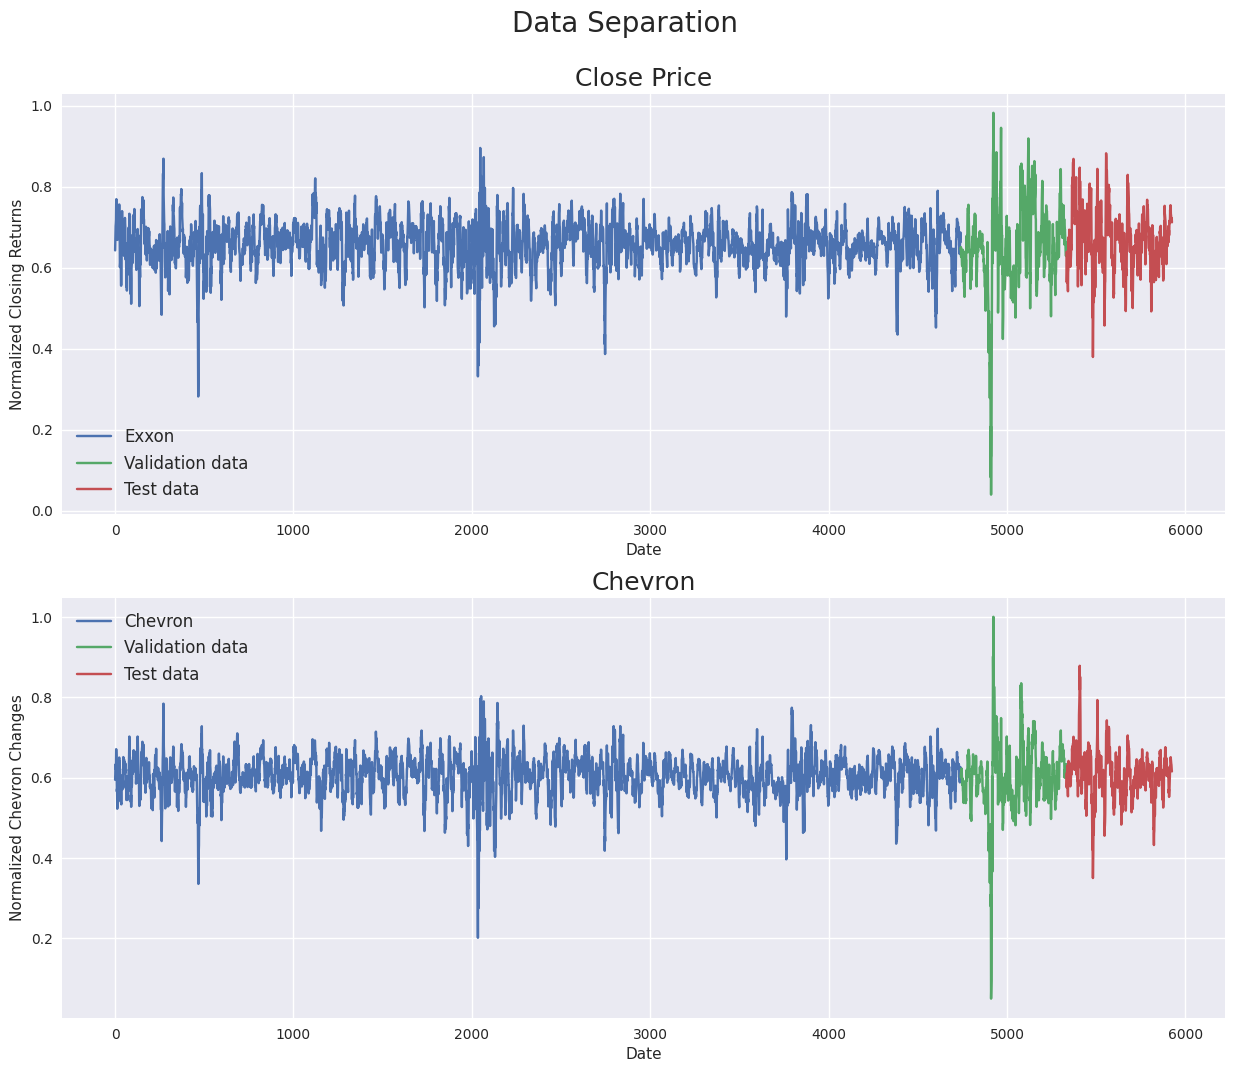

In [14]:
fig = plt.figure(figsize=(15,12))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.95)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Exxon')

ax1.plot(np.arange(train_data.shape[0],
                   train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0],
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')
ax1.set_title("Close Price", fontsize=18)
ax1.legend(loc="best", fontsize=12)

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data2.shape[0]), df_train2['Close'], label='Chevron')

ax2.plot(np.arange(train_data2.shape[0],
                   train_data2.shape[0]+val_data2.shape[0]), df_val2['Close'], label='Validation data')

ax2.plot(np.arange(train_data2.shape[0]+val_data2.shape[0],
                   train_data2.shape[0]+val_data2.shape[0]+test_data2.shape[0]), df_test2['Close'], label='Test data')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Chevron Changes')
ax2.set_title("Chevron", fontsize=18)
ax2.legend(loc="best", fontsize=12)

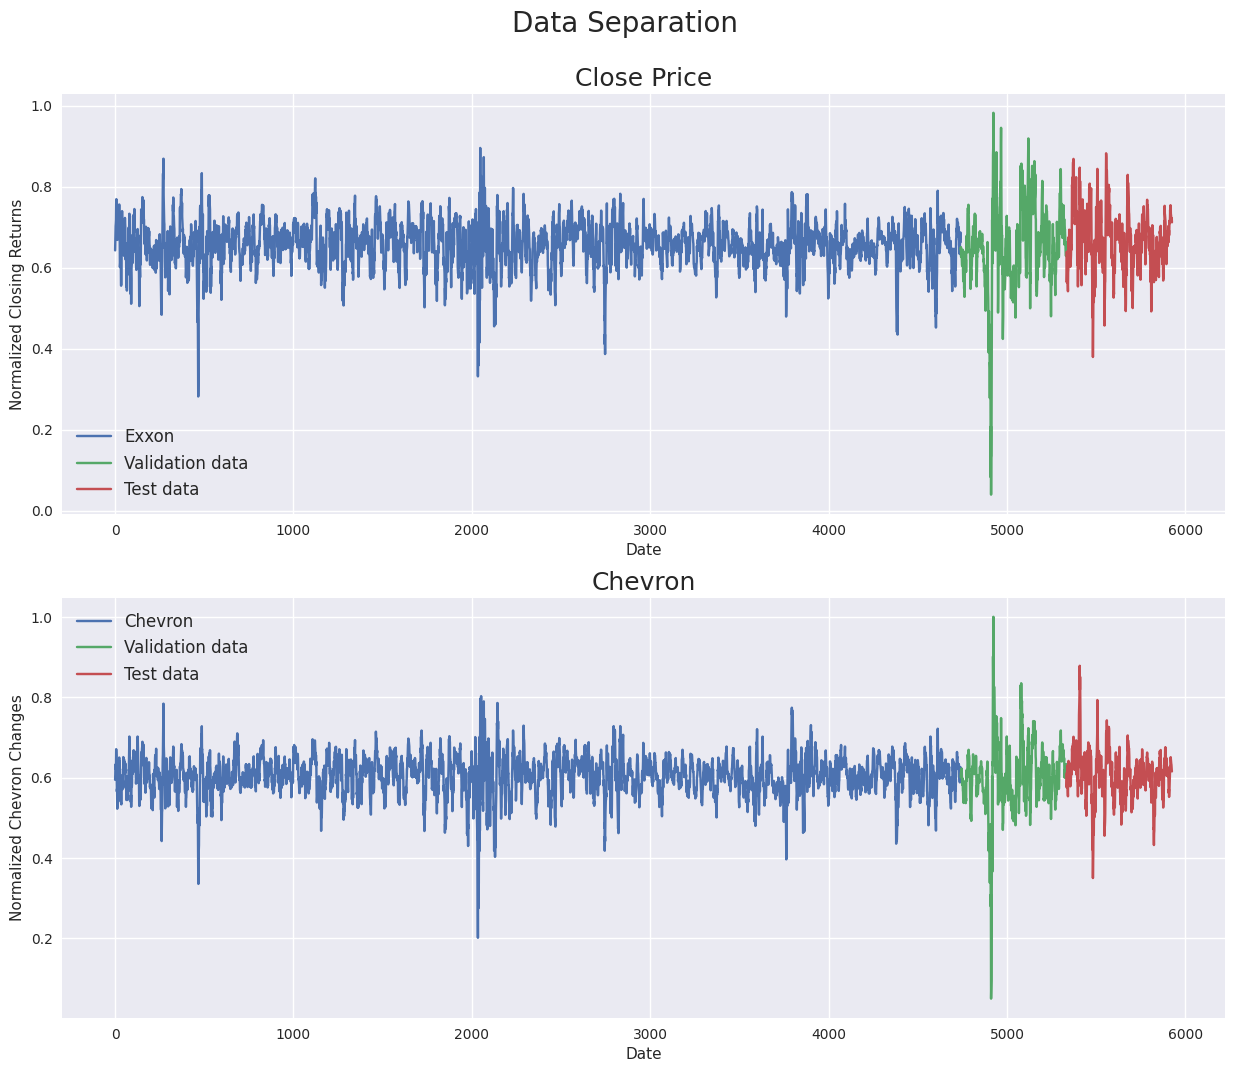

In [15]:
fig = plt.figure(figsize=(15,12))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.95)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Exxon')

ax1.plot(np.arange(train_data.shape[0],
                   train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0],
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')
ax1.set_title("Close Price", fontsize=18)
ax1.legend(loc="best", fontsize=12)

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data2.shape[0]), df_train2['Close'], label='Chevron')

ax2.plot(np.arange(train_data2.shape[0],
                   train_data2.shape[0]+val_data2.shape[0]), df_val2['Close'], label='Validation data')

ax2.plot(np.arange(train_data2.shape[0]+val_data2.shape[0],
                   train_data2.shape[0]+val_data2.shape[0]+test_data2.shape[0]), df_test2['Close'], label='Test data')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Chevron Changes')
ax2.set_title("Chevron", fontsize=18)
ax2.legend(loc="best", fontsize=12)

In [16]:
seq_len = 120

In [17]:
X_train, y_train = [], []

for i in range(seq_len, len(train_data2)):
  input = np.concatenate((train_data[i-seq_len:i],train_data2[i-seq_len:i]),axis=0)
  exxon_target = np.array(train_data[:, 3][i])
  chevron_target = np.array(train_data2[:, 3][i])

  X_train.append(input) # Chunks of training data with a length of 128 df-rows
  y_train.append([exxon_target,chevron_target]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)


X_val, y_val = [], []

for i in range(seq_len, len(val_data2)):
  input = np.concatenate((val_data[i-seq_len:i],val_data2[i-seq_len:i]),axis=0)
  exxon_target = np.array(val_data[:, 3][i])
  chevron_target = np.array(val_data2[:, 3][i])

  X_val.append(input) # Chunks of training data with a length of 128 df-rows
  y_val.append([exxon_target,chevron_target]) #Value of 4th column (Close Price) of df-row 128+1

X_val, y_val = np.array(X_val), np.array(y_val)


X_test, y_test = [], []

for i in range(seq_len, len(test_data2)):
  input = np.concatenate((test_data[i-seq_len:i],test_data2[i-seq_len:i]),axis=0)
  exxon_target = np.array(test_data[:, 3][i])
  chevron_target = np.array(test_data2[:, 3][i])

  X_test.append(input) # Chunks of training data with a length of 128 df-rows
  y_test.append([exxon_target,chevron_target]) #Value of 4th column (Close Price) of df-row 128+1


X_test, y_test = np.array(X_test), np.array(y_test)

print('Training set shape', X_train.shape, y_train.shape)
print('Validation set shape', X_val.shape, y_val.shape)
print('Testing set shape' ,X_test.shape, y_test.shape)


Training set shape (4621, 240, 5) (4621, 2)
Validation set shape (473, 240, 5) (473, 2)
Testing set shape (472, 240, 5) (472, 2)


In [18]:
class Time2Vector(Layer):
  def __init__(self, seq_len, **kwargs):
    super(Time2Vector, self).__init__()
    self.seq_len = seq_len

  def build(self, input_shape):
    '''Initialize weights and biases with shape (batch, seq_len)'''
    # initiate 4 matrices, 2 for ω and 2 forφ since we need aω and φ matrix for
    # both non-periodical (linear) and the periodical (sin) features.
    self.weights_linear = self.add_weight(name='weight_linear',
                                shape=(2*int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_linear = self.add_weight(name='bias_linear',
                                shape=(2*int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.weights_periodic = self.add_weight(name='weight_periodic',
                                shape=(2*int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_periodic = self.add_weight(name='bias_periodic',
                                shape=(2*int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)


  def call(self, x):

    x = tf.math.reduce_mean(x[:,:,:4], axis=-1)


    time_linear = self.weights_linear * x + self.bias_linear # Linear time feature
    time_linear = tf.expand_dims(time_linear, axis=-1) # Add dimension (batch, seq_len, 1)

    time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
    time_periodic = tf.expand_dims(time_periodic, axis=-1) # Add dimension (batch, seq_len, 1)

    # concatenate the linear and periodic time feature. (batch_size, seq_len, 2)
    return tf.concat([time_linear, time_periodic], axis=-1) # shape = (batch, seq_len, 2)

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'seq_len': self.seq_len})
    return config

In [19]:
d_k = 240
d_v = 240
n_heads = 12
ff_dim = 240

In [20]:
from tensorflow.keras.optimizers import Adam
class SingleAttention(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k,
                       input_shape=input_shape,
                       kernel_initializer='glorot_uniform',
                       bias_initializer='glorot_uniform')

    self.key = Dense(self.d_k,
                     input_shape=input_shape,
                     kernel_initializer='glorot_uniform',
                     bias_initializer='glorot_uniform')

    self.value = Dense(self.d_v,
                       input_shape=input_shape,
                       kernel_initializer='glorot_uniform',
                       bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    q = self.query(inputs[0])
    k = self.key(inputs[1])

    attn_weights = tf.matmul(q, k, transpose_b=True)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)

    v = self.value(inputs[2])
    attn_out = tf.matmul(attn_weights, v)
    return attn_out

#############################################################################

class MultiAttention(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention(self.d_k, self.d_v))

    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7
    self.linear = Dense(input_shape[0][-1],
                        input_shape=input_shape,
                        kernel_initializer='glorot_uniform',
                        bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
    concat_attn = tf.concat(attn, axis=-1)
    multi_linear = self.linear(concat_attn)
    return multi_linear

#############################################################################

class TransformerEncoder(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.1, **kwargs):
    super(TransformerEncoder, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)

    self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, activation='relu')
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1] = 7
    self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], kernel_size=1)
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_layer = self.attn_normalize(inputs[0] + attn_layer)

    ff_layer = self.ff_conv1D_1(attn_layer)
    ff_layer = self.ff_conv1D_2(ff_layer)
    ff_layer = self.ff_dropout(ff_layer)
    ff_layer = self.ff_normalize(inputs[0] + ff_layer)
    return ff_layer

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'d_k': self.d_k,
                   'd_v': self.d_v,
                   'n_heads': self.n_heads,
                   'ff_dim': self.ff_dim,
                   'attn_heads': self.attn_heads,
                   'dropout_rate': self.dropout_rate})
    return config

def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer4 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  '''Construct model'''
  in_seq = Input(shape=( 2*seq_len, 5))
  x = time_embedding(in_seq)
  x = Concatenate(axis=-1)([in_seq, x])
  x = attn_layer1((x, x, x))
  x = attn_layer2((x, x, x))
  x = attn_layer3((x, x, x))
  x = attn_layer4((x, x, x))
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  x = Dropout(0.1)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.1)(x)
  out = Dense(2, activation='relu')(x)

  optimizer = Adam(learning_rate=0.0007)
  model = Model(inputs=in_seq, outputs=out)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mape'])

  return model


In [21]:
model = create_model()
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/layer_normalization.py:122: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 240, 5)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time2_vector        │ (None, 240, 2)    │        960 │ input_layer[0][0] │
│ (Time2Vector)       │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 240, 7)    │          0 │ input_layer[0][0… │
│ (Concatenate)       │                   │            │ time2_vector[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encoder │ (None, 240, 7)    │     92,922 │ concatenate[0][0… │
│ (TransformerEncode… │                   │            │ concatenate[0][0… │
│                     │                   │            │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encode… │ (None, 240, 7)    │     92,922 │ transformer_enco… │
│ (TransformerEncode… │                   │            │ transformer_enco… │
│                     │                   │            │ transformer_enco… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encode… │ (None, 240, 7)    │     92,922 │ transformer_enco… │
│ (TransformerEncode… │                   │            │ transformer_enco… │
│                     │                   │            │ transformer_enco… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encode… │ (None, 240, 7)    │     92,922 │ transformer_enco… │
│ (TransformerEncode… │                   │            │ transformer_enco… │
│                     │                   │            │ transformer_enco… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 240)       │          0 │ transformer_enco… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 240)       │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_148 (Dense)   │ (None, 64)        │     15,424 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 64)        │          0 │ dense_148[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_149 (Dense)   │ (None, 2)         │        130 │ dropout_9[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 388,202 (1.48 MB)

 Trainable params: 388,202 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
batch_size = 32

In [23]:
callback = tf.keras.callbacks.ModelCheckpoint('Transformer+TimeEmbedding.keras',
                                              monitor='val_loss',
                                              save_best_only=True, verbose=1)

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=100,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))


Epoch 1/100


I0000 00:00:1713100462.044539     139 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  2/145 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - loss: 0.3997 - mae: 0.6289 - mape: 99.8883    

W0000 00:00:1713100462.356165     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - loss: 0.1411 - mae: 0.2842 - mape: 45.1688

W0000 00:00:1713100540.776175     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 0.01167, saving model to Transformer+TimeEmbedding.keras
145/145 ━━━━━━━━━━━━━━━━━━━━ 205s 670ms/step - loss: 0.1405 - mae: 0.2832 - mape: 45.0140 - val_loss: 0.0117 - val_mae: 0.0764 - val_mape: 17.6297
Epoch 2/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0066 - mae: 0.0638 - mape: 10.3259
Epoch 2: val_loss improved from 0.01167 to 0.01140, saving model to Transformer+TimeEmbedding.keras
145/145 ━━━━━━━━━━━━━━━━━━━━ 24s 165ms/step - loss: 0.0066 - mae: 0.0638 - mape: 10.3244 - val_loss: 0.0114 - val_mae: 0.0754 - val_mape: 17.9570
Epoch 3/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0058 - mae: 0.0596 - mape: 9.6615
Epoch 3: val_loss did not improve from 0.01140
145/145 ━━━━━━━━━━━━━━━━━━━━ 23s 160ms/step - loss: 0.0058 - mae: 0.0596 - mape: 9.6614 - val_loss: 0.0114 - val_mae: 0.0756 - val_mape: 18.0742
Epoch 4/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0056 - mae: 0.0584 - mape: 9.5291
Epoch 4: val_loss di

In [24]:
model = tf.keras.models.load_model('Transformer+TimeEmbedding.keras',
                                   custom_objects={'Time2Vector': Time2Vector,
                                                   'SingleAttention': SingleAttention,
                                                   'MultiAttention': MultiAttention,
                                                   'TransformerEncoder': TransformerEncoder})


###############################################################################
'''Calculate predictions and metrics'''

# Typical usage of Keras model is:
#   1. history = model.fit(X_train, y_train, X_val, y_val)    # Train with training and validation data
#   2. test_eval = model.evaluate(X_test, y_test)             # Evaluate loss/metrics with test data
#   3. new_pred = model.pred(new_X)                           # Predict on new unseen data
#
# However, below, we follow a different order by calling both predict() and evaluate()
# on all the train, valid and test data

#Calculate predication for training, validation and test data
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

#Print evaluation metrics for all datasets
# Returned eval object contains loss and metric values
train_eval = model.evaluate(X_train, y_train, verbose=0)
val_eval = model.evaluate(X_val, y_val, verbose=0)
test_eval = model.evaluate(X_test, y_test, verbose=0)
print(' ')
print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))



145/145 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 482ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 496ms/step


W0000 00:00:1713102986.227751     139 graph_launch.cc:161] Evict all gpu graphs from executor 0x5aab11ca8d00


 
Evaluation metrics
Training Data - Loss: 0.0006, MAE: 0.0181, MAPE: 2.9351
Validation Data - Loss: 0.0038, MAE: 0.0396, MAPE: 10.3040
Test Data - Loss: 0.0012, MAE: 0.0262, MAPE: 4.2386


In [25]:
print(train_pred.shape)

(4621, 2)


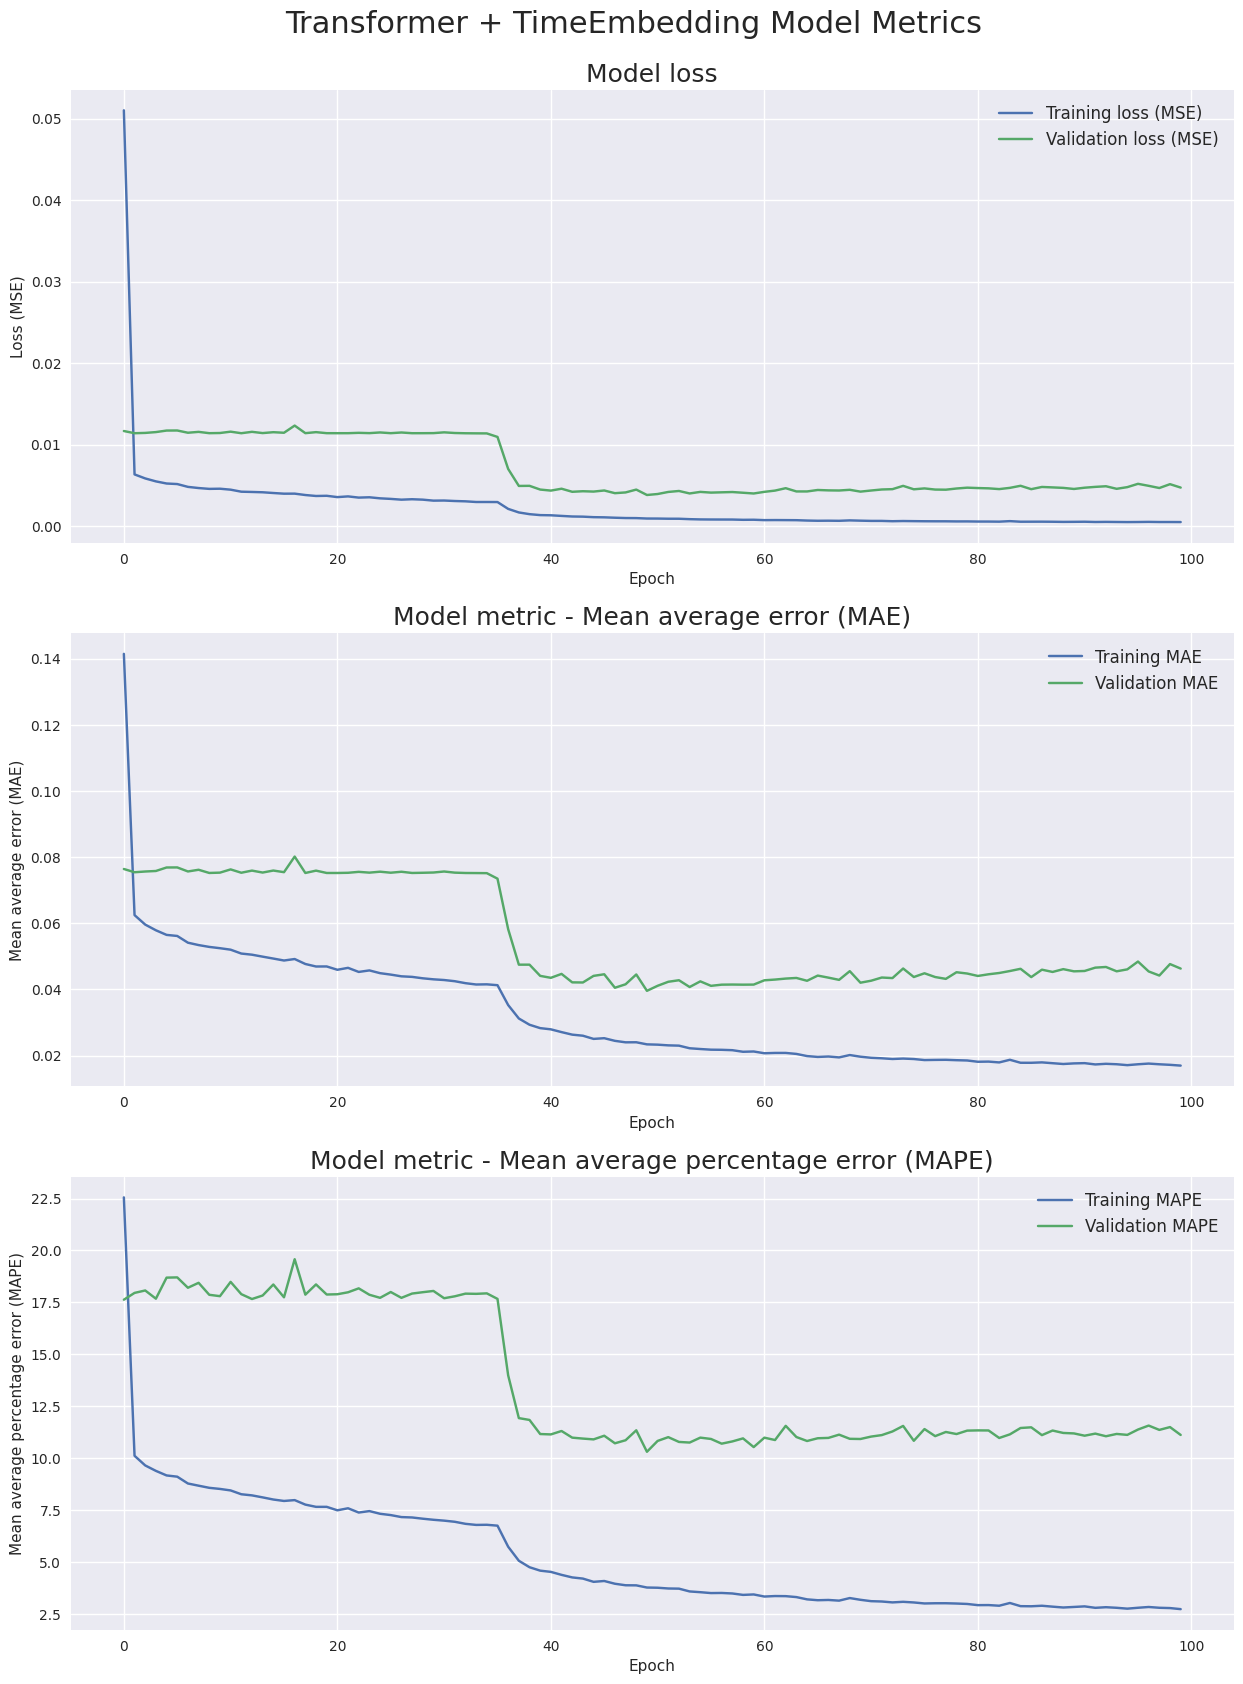

In [26]:
fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Transformer + TimeEmbedding Model Metrics", fontsize=22)
st.set_y(0.92)

#Plot model loss
ax1 = fig.add_subplot(311)
ax1.plot(history.history['loss'], label='Training loss (MSE)')
ax1.plot(history.history['val_loss'], label='Validation loss (MSE)')
ax1.set_title("Model loss", fontsize=18)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (MSE)')
ax1.legend(loc="best", fontsize=12)

#Plot MAE
ax2 = fig.add_subplot(312)
ax2.plot(history.history['mae'], label='Training MAE')
ax2.plot(history.history['val_mae'], label='Validation MAE')
ax2.set_title("Model metric - Mean average error (MAE)", fontsize=18)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Mean average error (MAE)')
ax2.legend(loc="best", fontsize=12)

#Plot MAPE
ax3 = fig.add_subplot(313)
ax3.plot(history.history['mape'], label='Training MAPE')
ax3.plot(history.history['val_mape'], label='Validation MAPE')
ax3.set_title("Model metric - Mean average percentage error (MAPE)", fontsize=18)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Mean average percentage error (MAPE)')
ax3.legend(loc="best", fontsize=12)


In [27]:
train_pred_chevron=train_pred[:,1]
train_pred_exxon = train_pred[:,0]

val_pred_chevron=val_pred[:,1]
val_pred_exxon = val_pred[:,0]

test_pred_chevron=test_pred[:,1]
test_pred_exxon = test_pred[:,0]

print(train_pred_chevron.shape)

(4621,)


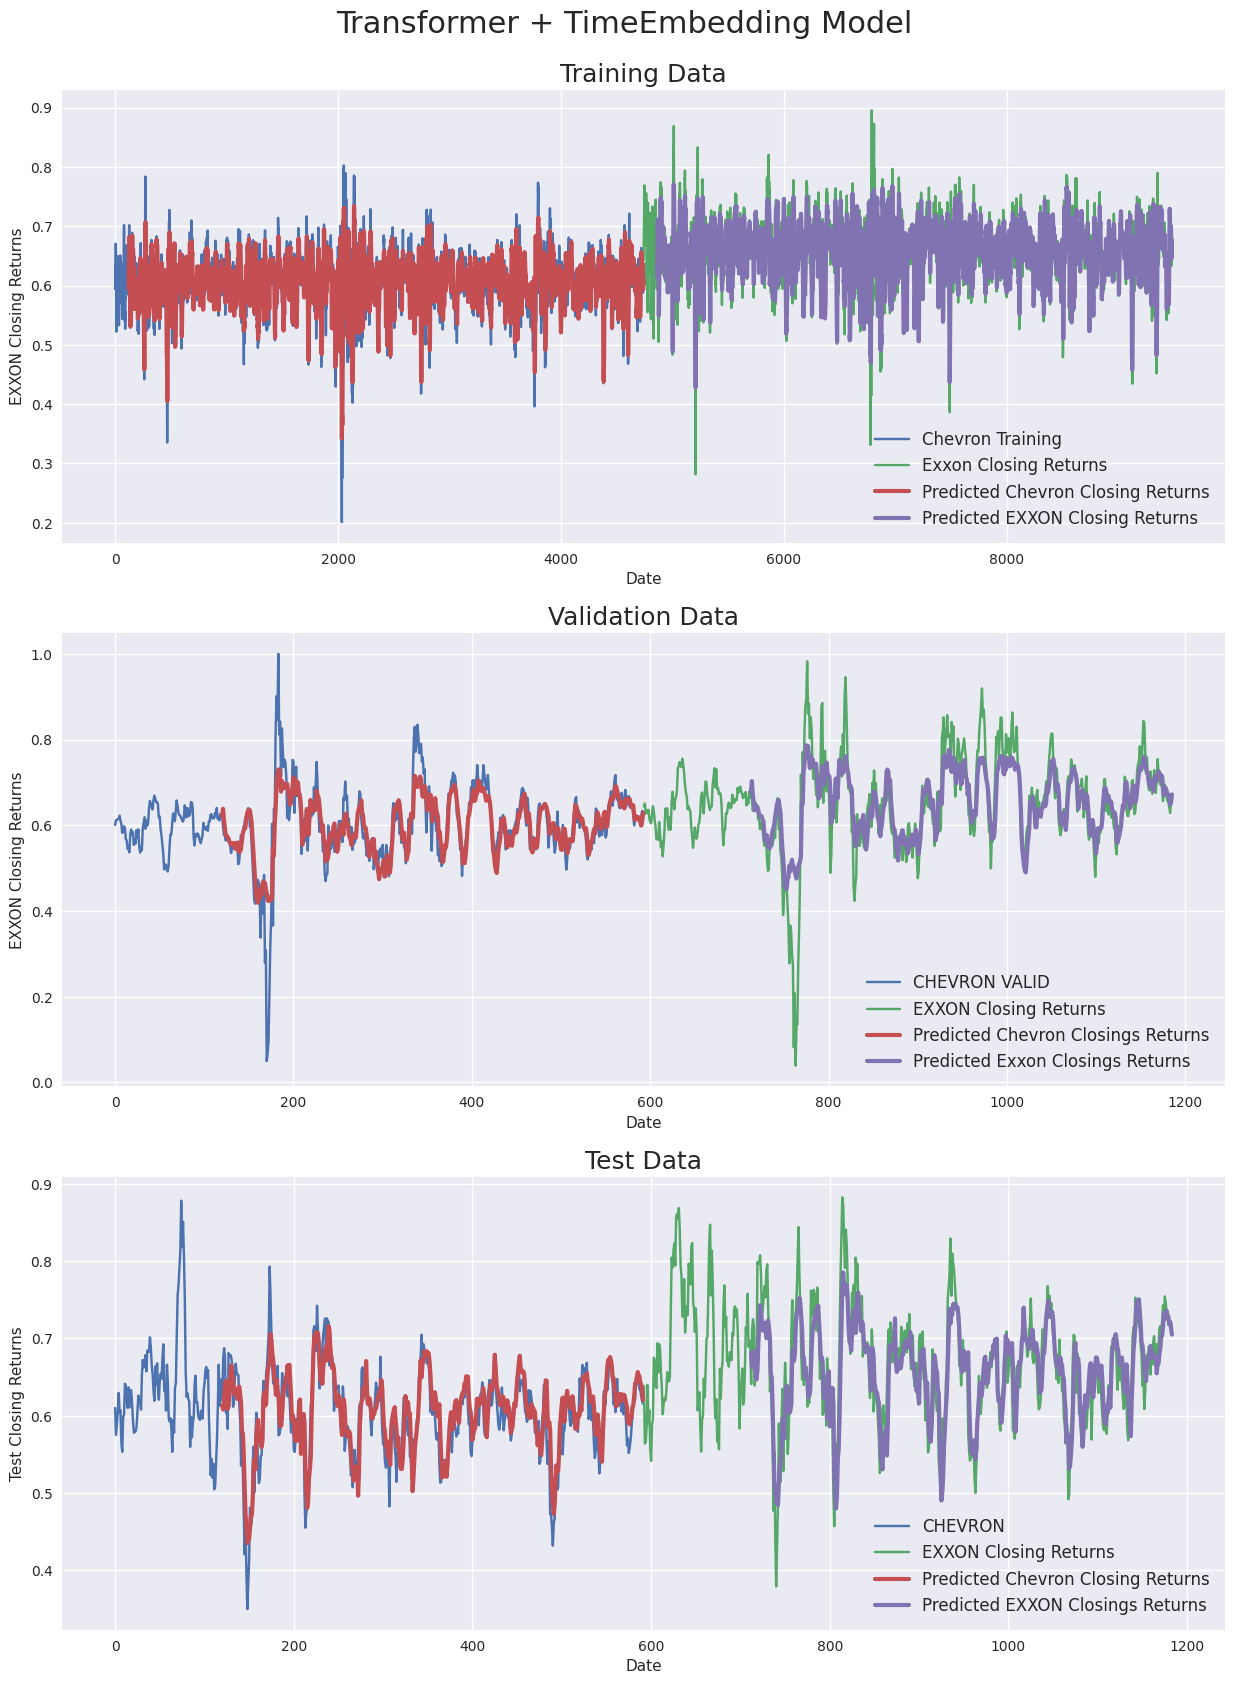

In [28]:
fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Transformer + TimeEmbedding Model", fontsize=22)
st.set_y(0.92)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(np.arange(train_data2.shape[0]), train_data2[:,3],label="Chevron Training")
ax11.plot(np.arange(train_data2.shape[0],train_data2.shape[0]+train_data.shape[0]),train_data[:, 3], label='Exxon Closing Returns')
ax11.plot(np.arange(seq_len, train_pred_chevron.shape[0]+seq_len), train_pred_chevron, linewidth=3, label='Predicted Chevron Closing Returns')
ax11.plot(np.arange(seq_len + train_data2.shape[0], train_pred_exxon.shape[0]+train_data2.shape[0] +seq_len), train_pred_exxon, linewidth=3, label='Predicted EXXON Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('EXXON Closing Returns')
ax11.legend(loc="best", fontsize=12)

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(np.arange(val_data2.shape[0]),val_data2[:,3],label='CHEVRON VALID')
ax21.plot(np.arange(val_data2.shape[0], val_data2.shape[0] + val_data.shape[0]), val_data[:, 3], label='EXXON Closing Returns')
ax21.plot(np.arange(seq_len, val_pred_chevron.shape[0]+seq_len), val_pred_chevron, linewidth=3, label='Predicted Chevron Closings Returns')
ax21.plot(np.arange(seq_len + val_data2.shape[0], val_data2.shape[0]+ val_pred_exxon.shape[0] + seq_len), val_pred_exxon, linewidth=3, label='Predicted Exxon Closings Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('EXXON Closing Returns')
ax21.legend(loc="best", fontsize=12)

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(np.arange(test_data2.shape[0]),test_data2[:,3],label='CHEVRON')
ax31.plot(np.arange(test_data2.shape[0],test_data2.shape[0]+test_data.shape[0]),test_data[:, 3], label='EXXON Closing Returns')
ax31.plot(np.arange(seq_len, test_pred_chevron.shape[0]+seq_len), test_pred_chevron, linewidth=3, label='Predicted Chevron Closing Returns')
ax31.plot(np.arange(seq_len + test_data2.shape[0], test_data2.shape[0]+ test_pred_exxon.shape[0]+seq_len), test_pred_exxon, linewidth=3, label='Predicted EXXON Closings Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('Test Closing Returns')
ax31.legend(loc="best", fontsize=12)
